In [188]:
import numpy as np
import matplotlib.pyplot as plt

Quelques exos FFT pour tester les differents paramètres. 
prendre Fe=50MHz (Fe: fréquence d’échantillonnage)

1. Generer un signal CW à f0=10MHz 
afficher la FFT sur 256 samples  sur 512 et 1024 sample -> quelle est l'effet sur la précision ?

In [189]:
fs = 50e6 # 50 MHz sampling frequency
n_samples = [256, 512, 1024] # number of samples

for n in n_samples:
    print('Number of Samples: {}'.format(n))
    print('Sampling Duration: {:.2e}'.format(n/fs))
    print('Frequency Resolution: {:.2e}'.format(fs / n))
    print()

Number of Samples: 256
Sampling Duration: 5.12e-06
Frequency Resolution: 1.95e+05

Number of Samples: 512
Sampling Duration: 1.02e-05
Frequency Resolution: 9.77e+04

Number of Samples: 1024
Sampling Duration: 2.05e-05
Frequency Resolution: 4.88e+04



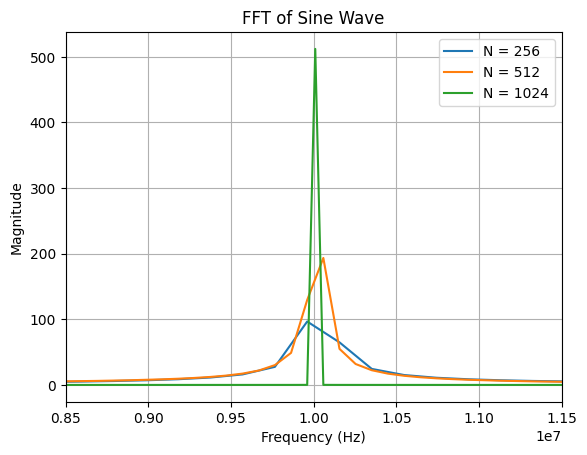

In [190]:
f0 = 10e6 # 10 MHz signal frequency

plt.figure()

for n in n_samples:
    t = np.linspace(0, n/fs, n)
    sampled_signal = np.sin(2 * np.pi * f0 * t)
    fft = np.fft.fft(sampled_signal)
    fft_freq = np.fft.fftfreq(n, 1/fs)
    fft = np.fft.fftshift(fft)
    fft_freq = np.fft.fftshift(fft_freq)
    
    plt.plot(fft_freq, np.abs(fft), label='N = {}'.format(n))
    
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of Sine Wave')
plt.xlim(f0*0.85, f0*1.15)
plt.legend()
plt.grid()
plt.show()

2. Generer un signal CW à f0=10MHz 
afficher la FFT sur 256 samples

Changer la fréquence de f0=10MHz à 10,2MHz par pas de 0.05 MHz -> Quel est l'effet ? 

[10000000. 10050000. 10100000. 10150000. 10200000.]


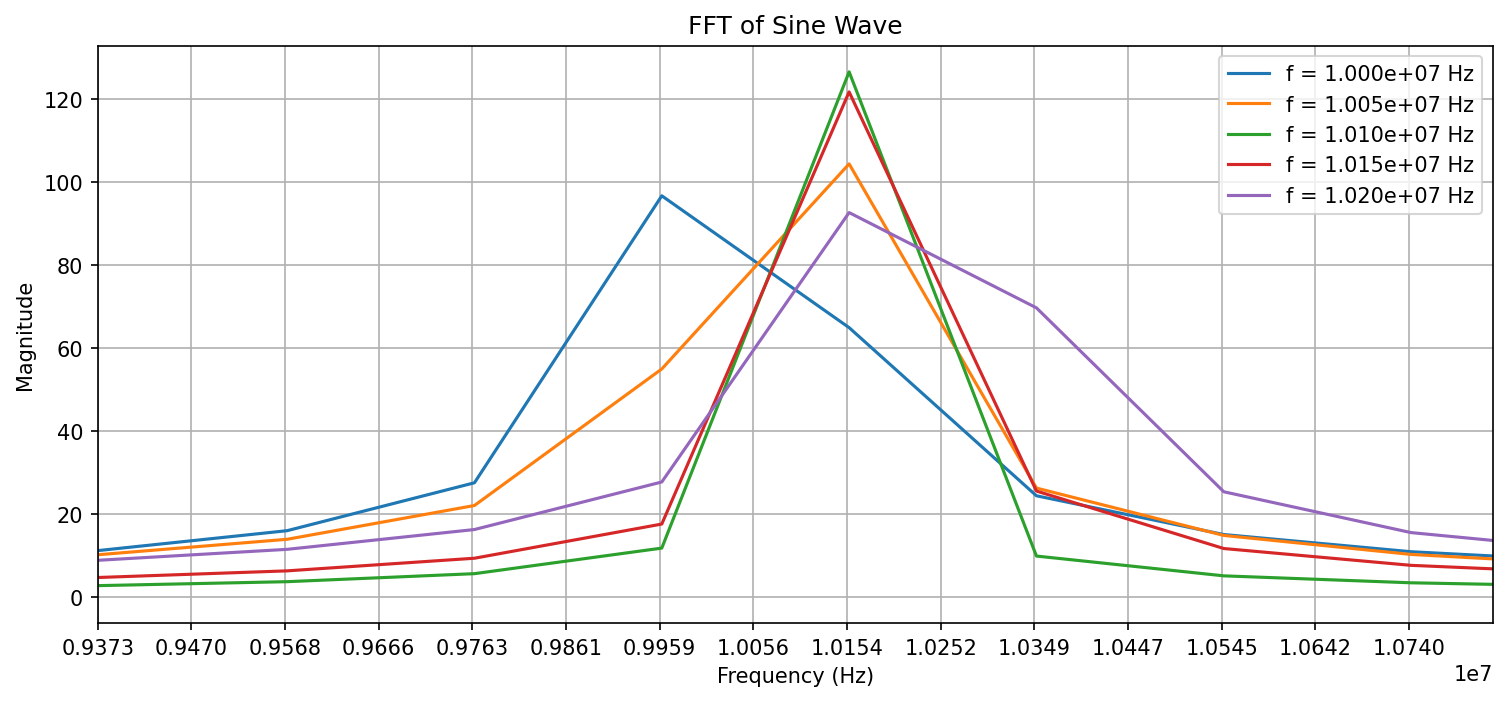

The frequency changes are smaller than the frequency resolution of the FFT for the given sampling frequency and observation time.
The frequencies in between the domain points appear with a wider bandwidth.


In [191]:
f0 = 10e6 # 10 MHz signal frequency
f1 = 10.2e6 # 10.2 MHz signal frequency
f_mean = (f0+f1)/2
increment = 0.05e6 # 50 kHz/s frequency slope
n = 256

frequencies = np.arange(f0, f1+1, increment)
print(frequencies)

t = np.linspace(0, n/fs, n)

plt.figure(figsize=(12, 5), dpi=150)

for f in frequencies:
    sampled_signal = np.sin(2 * np.pi * f * t)
    fft = np.fft.fft(sampled_signal)
    fft_freq = np.fft.fftfreq(n, 1/fs)
    fft = np.fft.fftshift(fft)
    fft_freq = np.fft.fftshift(fft_freq)
    plt.plot(fft_freq, np.abs(fft), label='f = {:.3e} Hz'.format(f))

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of Sine Wave')
plt.xlim(f_mean*0.928, f_mean*1.072)
plt.xticks(np.arange(f_mean*0.928, f_mean*1.072, fs/n/2))
plt.legend()
plt.grid()
plt.show()

print('The frequency changes are smaller than the frequency resolution of the FFT for the given sampling frequency and observation time.')
print('The frequencies in between the domain points appear with a wider bandwidth.')

3. Generer un signal CW à f0=10MHz  de 256 samples à Fe=50MHz

Rajouter des echantillons de valeur nulle avant et après le signal pour obtenir un signal de longeur 2048 et faire une FFT
Faire varier la fréquence de f0=10MHz à 10,2MHz par pas de 0.05 MHz. 

Size of signal: 2048


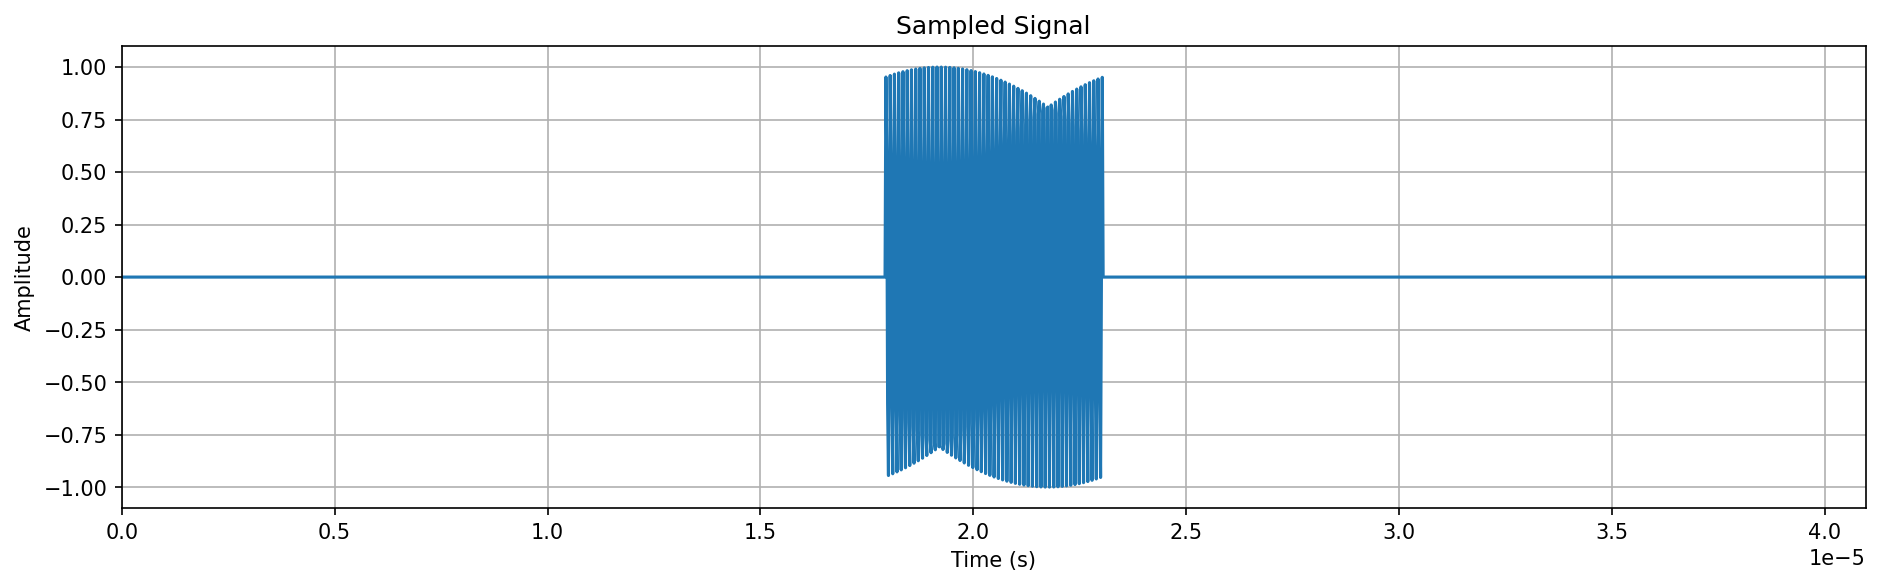

In [192]:
f0 = 10e6 # 10 MHz signal frequency
fs = 50e6 # 50 MHz sampling frequency
n = 256 # number of samples

signal_size = 2048

t = np.linspace(0, n/fs, n)

sampled_signal = np.sin(2 * np.pi * f0 * t)

fft_isolated = np.fft.fft(sampled_signal)
fft_isolated_freq = np.fft.fftfreq(n, 1/fs)
fft_isolated = np.fft.fftshift(fft_isolated)
fft_isolated_freq = np.fft.fftshift(fft_isolated_freq)

sampled_signal = np.concatenate((np.zeros(int((signal_size - n)/2)), sampled_signal, np.zeros(int((signal_size - n)/2))))

t = np.linspace(0, signal_size/fs, signal_size)

print('Size of signal: {}'.format(sampled_signal.size))

plt.figure(figsize=(15, 4), dpi=150)
plt.plot(t, sampled_signal)
plt.xlim(0, signal_size/fs)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sampled Signal')
plt.grid()
plt.show()


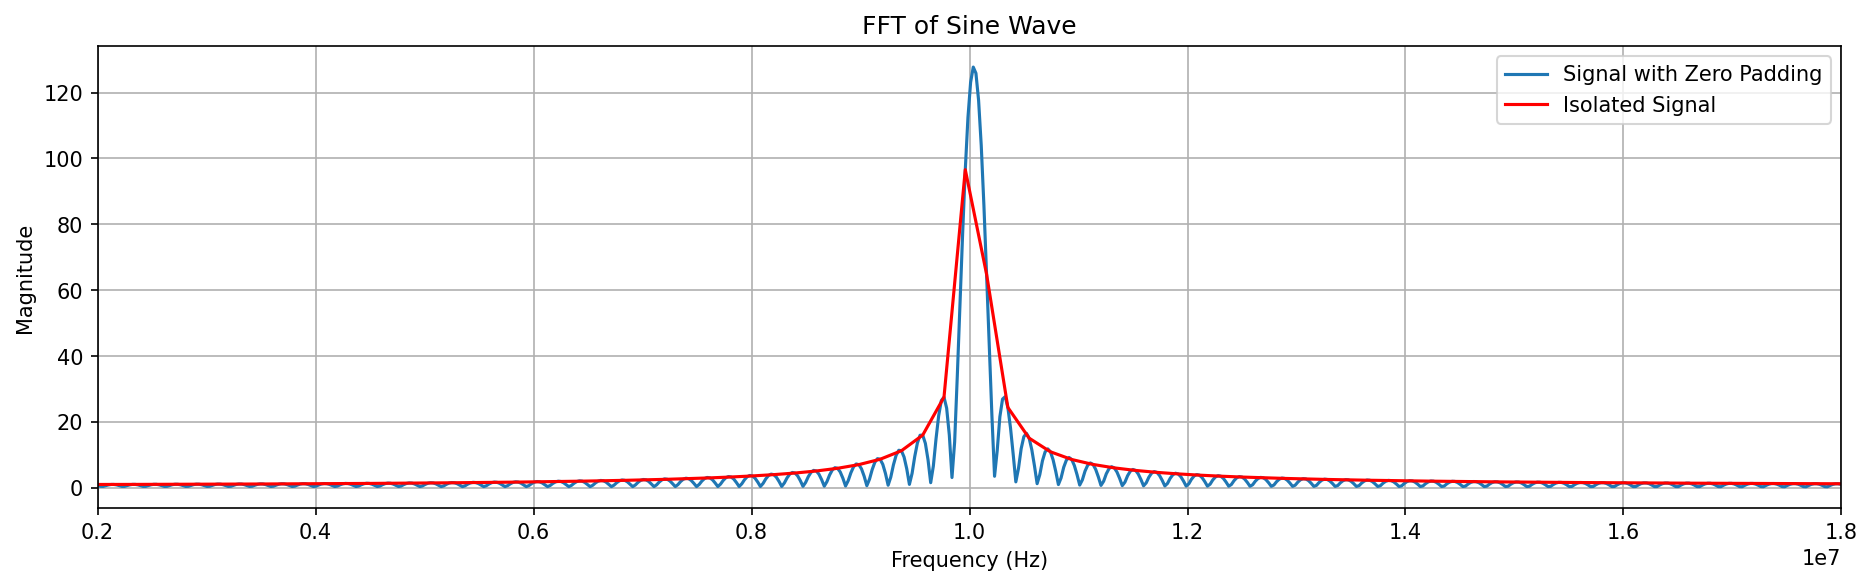

That is very interesting, I originally thought that the zeros in the sampling would make the fft worst but it just improves its resolution.
It always comes down to the time of observation thing, right?
But sure, with a cost of computational complexity.
fft complexity: 2048.0 -> 22528.0, ratio: 704.0
Frequency resolution: 195312.5 -> 24414.0625, ratio: 0.125


In [193]:
fft = np.fft.fft(sampled_signal)
fft_freq = np.fft.fftfreq(signal_size, 1/fs)
fft = np.fft.fftshift(fft)
fft_freq = np.fft.fftshift(fft_freq)

plt.figure(figsize=(15, 4), dpi=150)
plt.plot(fft_freq, np.abs(fft), label = 'Signal with Zero Padding')
plt.plot(fft_isolated_freq, np.abs(fft_isolated), 'r', label='Isolated Signal')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of Sine Wave')
plt.xlim(f0*0.2, f0*1.8)
plt.grid()
plt.show()

print('That is very interesting, I originally thought that the zeros in the sampling would make the fft worst but it just improves its resolution.')
print('It always comes down to the time-frequency trade-off, right?')
print('But sure, with a cost of computational complexity.')
print(f'fft complexity: {n*np.log2(n)} -> {signal_size*np.log2(signal_size)}, ratio: {signal_size*np.log2(signal_size)/n*np.log2(n)}')
print(f'Frequency resolution: {fs/n} -> {fs/signal_size}, ratio: {(fs/signal_size)/(fs/n)}')


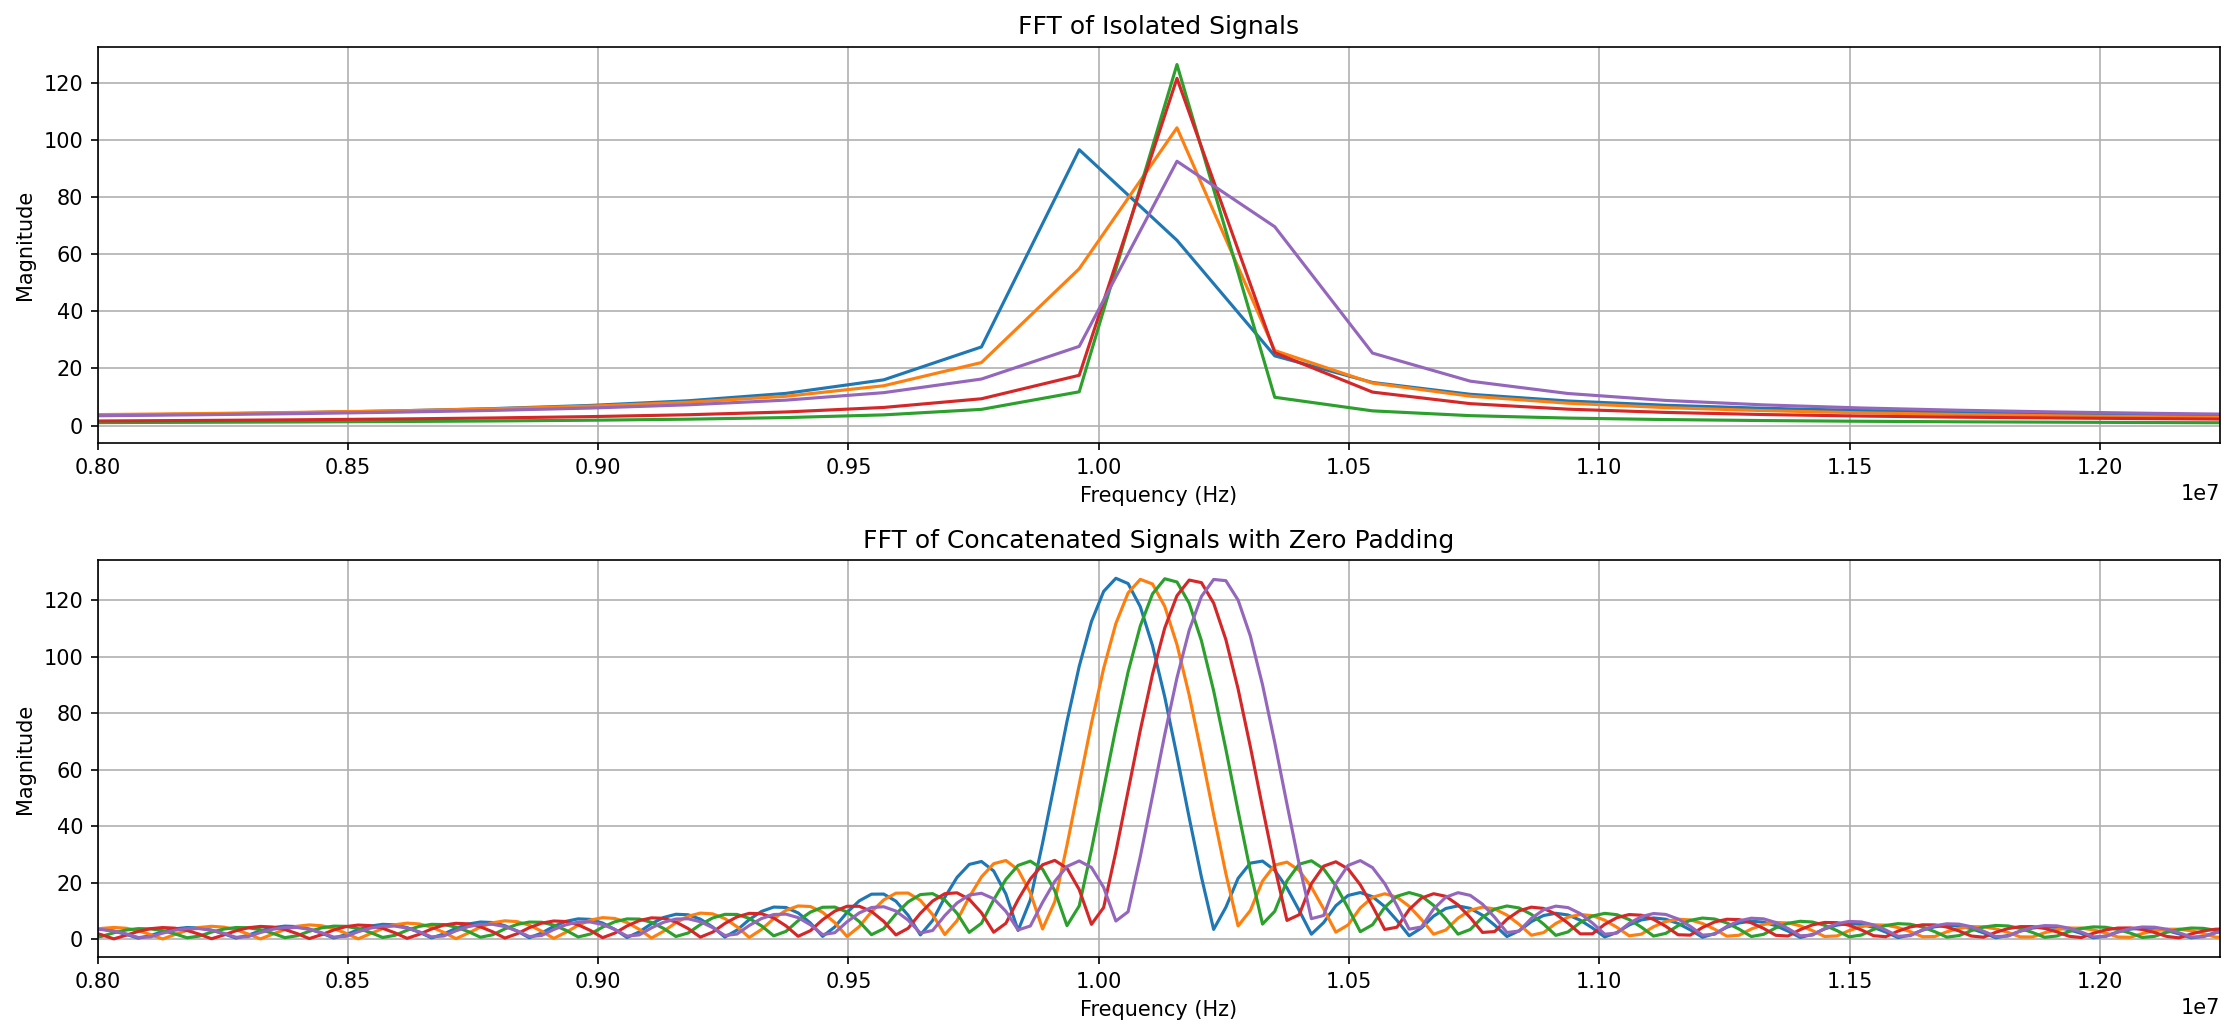

In [194]:
f0 = 10e6  # 10 MHz signal frequency
f1 = 10.2e6  # 10.2 MHz signal frequency
increment = 0.05e6  # 50 kHz/s frequency slope
frequencies = np.arange(f0, f1 + 1, increment)

fs = 50e6  # 50 MHz sampling frequency
n = 256  # number of samples
signal_size = 2048

# Time vector for sampling
t = np.linspace(0, n / fs, n)

# Containers for FFT results
isolated_ffts = []
concatenated_ffts = []
fft_freq = np.fft.fftshift(np.fft.fftfreq(signal_size, 1/fs))

# Generate and process each frequency
for freq in frequencies:
    # Generate isolated signal
    sampled_signal = np.sin(2 * np.pi * freq * t)
    
    # FFT of isolated signal
    fft_isolated = np.fft.fft(sampled_signal)
    fft_isolated = np.fft.fftshift(fft_isolated)
    isolated_ffts.append(np.abs(fft_isolated))
    
    # Zero-padding and FFT of concatenated signal
    padded_signal = np.concatenate((np.zeros(int((signal_size - n) / 2)), sampled_signal, np.zeros(int((signal_size - n) / 2))))
    fft = np.fft.fft(padded_signal)
    fft = np.fft.fftshift(fft)
    concatenated_ffts.append(np.abs(fft))

# Frequency domain for isolated signals (not padded, so size n)
fft_isolated_freq = np.fft.fftfreq(n, 1/fs)
fft_isolated_freq = np.fft.fftshift(fft_isolated_freq)

# Plot the results: Isolated signals above and concatenated signals below
fig, axes = plt.subplots(2, 1, figsize=(15, 7), dpi=150)

xlim_low = f0 * 0.8
xlim_high = f1 * 1.2

# Plot isolated FFTs (corrected frequency axis)
for fft_isolated in isolated_ffts:
    axes[0].plot(fft_isolated_freq, fft_isolated)
axes[0].set_title('FFT of Isolated Signals')
axes[0].set_xlabel('Frequency (Hz)')
axes[0].set_ylabel('Magnitude')
axes[0].set_xlim(xlim_low, xlim_high)
axes[0].grid()

# Plot concatenated FFTs
for fft_concat in concatenated_ffts:
    axes[1].plot(fft_freq, fft_concat)
axes[1].set_title('FFT of Concatenated Signals with Zero Padding')
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Magnitude')
axes[1].set_xlim(xlim_low, xlim_high)
axes[1].grid()

plt.tight_layout()
plt.show()


4. multiplier la Fe par 2 (=100MHz) et prendre deux fois plus d'echantillons -> la durée reste la même

Generer un signal CW à f0=10MHz  de 512 samples à Fe=100MHz

Rajouter des echantillons de valeur nulle avant et après le signal pour obtenir un signal de longeur 4096 et faire une FFT

Faire varier la fréquence de f0=10MHz à 10,2MHz par pas de 0.05 MHz. 

Because both sampling frequency and number of samples are doubled, the frequency resolution is the same, so nothing will change from the last exercise.
The difference consists in the trade-off between observation time and frequency resolution.
(I used to know this kind of things haha, its been a while since I last worked with signals but reviewing this made me remember that I was right choosing eletrical engineering. I really like this stuff.)


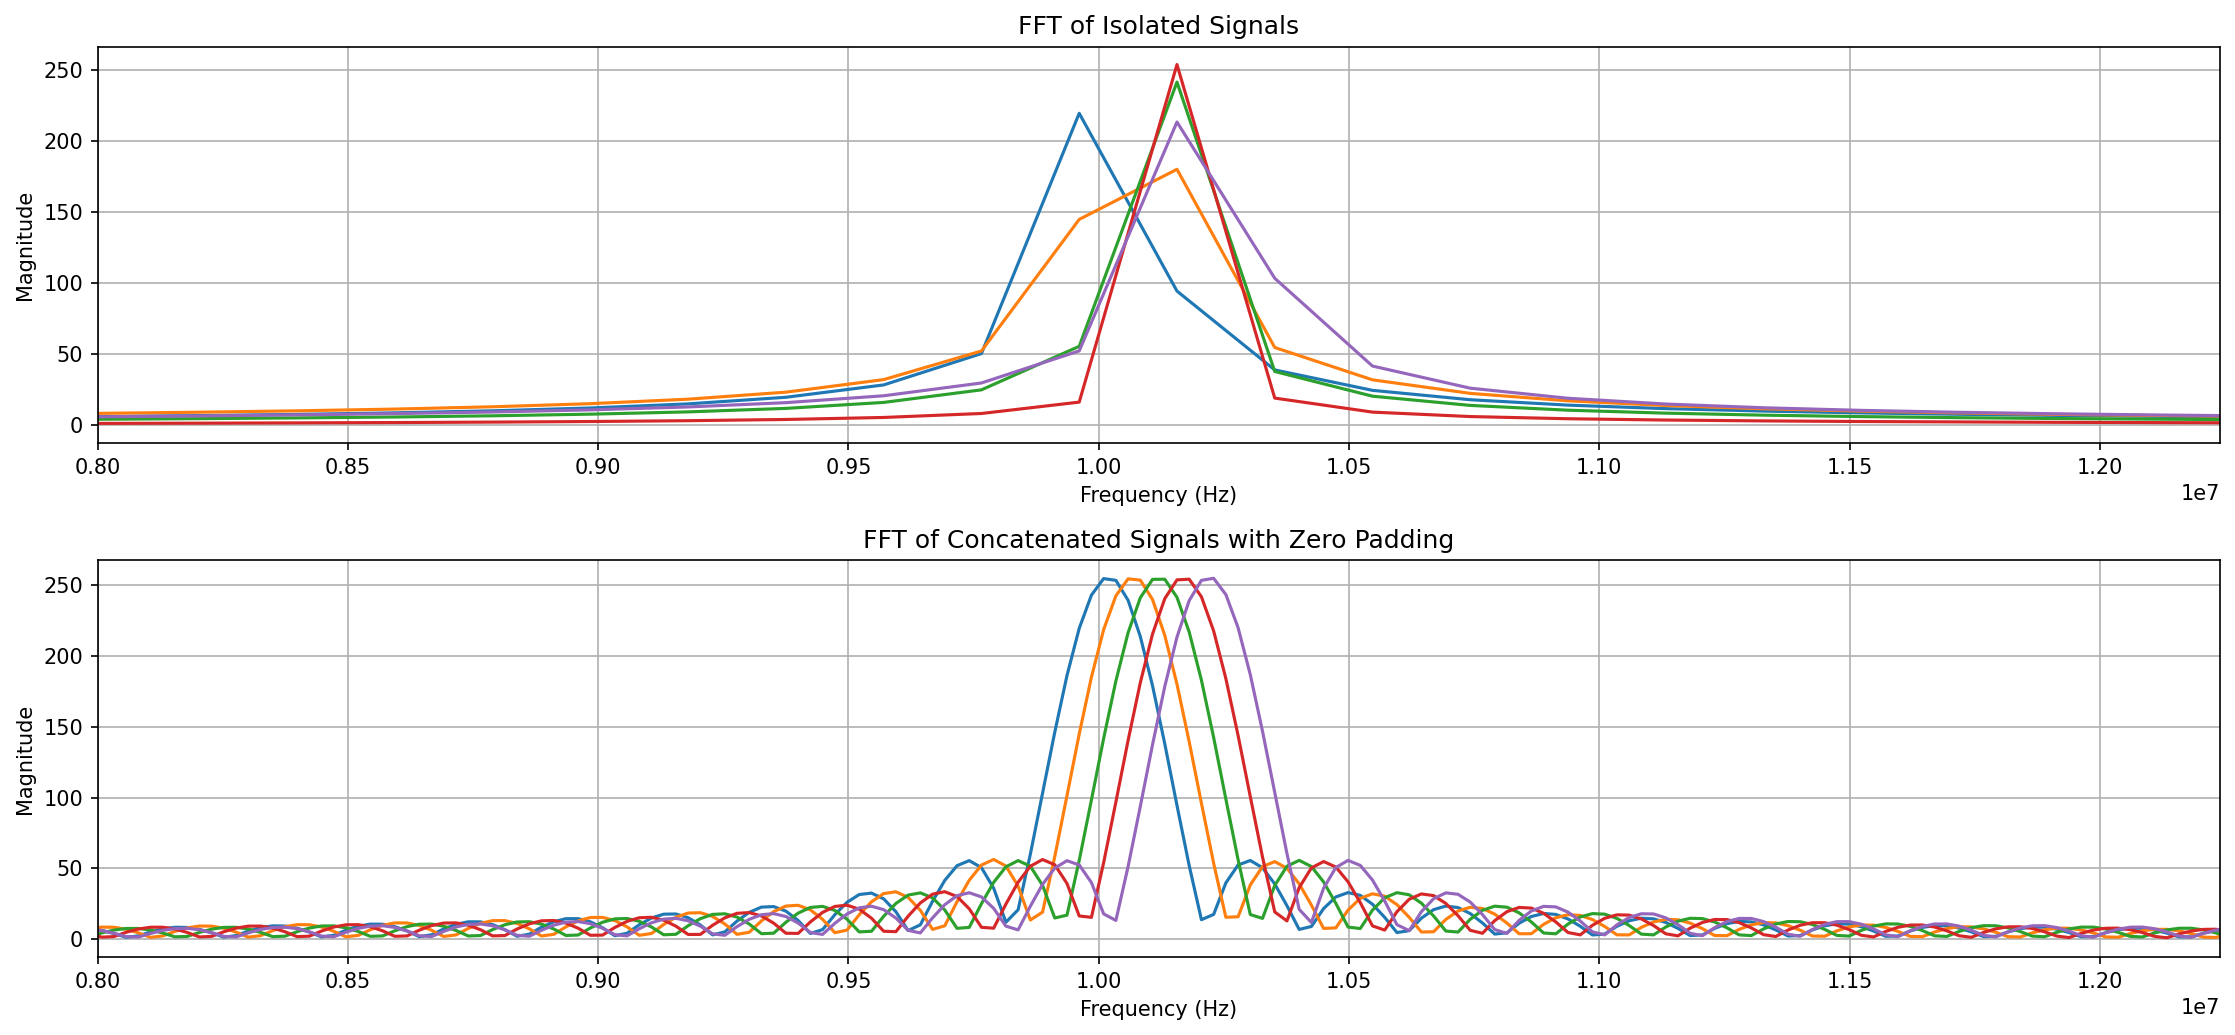

In [195]:
f0 = 10e6  # 10 MHz signal frequency
f1 = 10.2e6  # 10.2 MHz signal frequency
increment = 0.05e6  # 50 kHz/s frequency slope
frequencies = np.arange(f0, f1 + 1, increment)

fs = 100e6  # 50 MHz sampling frequency
n = 512  # number of samples
signal_size = 4096

print('Because both sampling frequency and number of samples are doubled, the frequency resolution is the same, so nothing will change from the last exercise.')
print('The difference consists in the trade-off between observation time and frequency resolution.')
print('(I used to know this kind of things haha, its been a while since I last worked with signals but reviewing this made me remember that I was right choosing eletrical engineering. I really like this stuff.)')

# Time vector for sampling
t = np.linspace(0, n / fs, n)

# Containers for FFT results
isolated_ffts = []
concatenated_ffts = []
fft_freq = np.fft.fftshift(np.fft.fftfreq(signal_size, 1/fs))

# Generate and process each frequency
for freq in frequencies:
    # Generate isolated signal
    sampled_signal = np.sin(2 * np.pi * freq * t)
    
    # FFT of isolated signal
    fft_isolated = np.fft.fft(sampled_signal)
    fft_isolated = np.fft.fftshift(fft_isolated)
    isolated_ffts.append(np.abs(fft_isolated))
    
    # Zero-padding and FFT of concatenated signal
    padded_signal = np.concatenate((np.zeros(int((signal_size - n) / 2)), sampled_signal, np.zeros(int((signal_size - n) / 2))))
    fft = np.fft.fft(padded_signal)
    fft = np.fft.fftshift(fft)
    concatenated_ffts.append(np.abs(fft))

# Frequency domain for isolated signals (not padded, so size n)
fft_isolated_freq = np.fft.fftfreq(n, 1/fs)
fft_isolated_freq = np.fft.fftshift(fft_isolated_freq)

# Plot the results: Isolated signals above and concatenated signals below
fig, axes = plt.subplots(2, 1, figsize=(15, 7), dpi=150)

xlim_low = f0 * 0.8
xlim_high = f1 * 1.2

# Plot isolated FFTs (corrected frequency axis)
for fft_isolated in isolated_ffts:
    axes[0].plot(fft_isolated_freq, fft_isolated)
axes[0].set_title('FFT of Isolated Signals')
axes[0].set_xlabel('Frequency (Hz)')
axes[0].set_ylabel('Magnitude')
axes[0].set_xlim(xlim_low, xlim_high)
axes[0].grid()

# Plot concatenated FFTs
for fft_concat in concatenated_ffts:
    axes[1].plot(fft_freq, fft_concat)
axes[1].set_title('FFT of Concatenated Signals with Zero Padding')
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Magnitude')
axes[1].set_xlim(xlim_low, xlim_high)
axes[1].grid()

plt.tight_layout()
plt.show()


5. refaire toutes les questions avec un second signal à f1=10,4 MHz

5.1

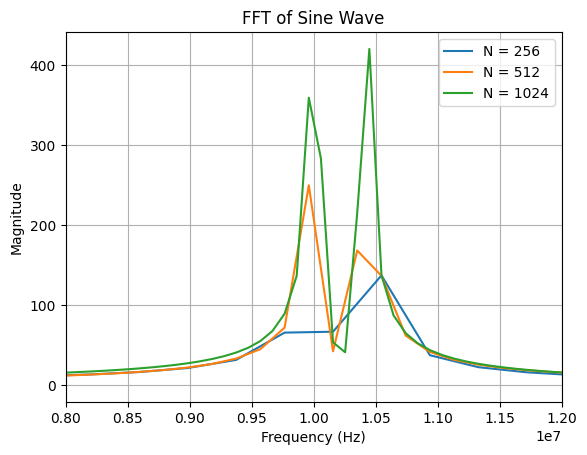

In [198]:
f0 = 10e6 # 10 MHz signal frequency
f_other = 10.4e6 # 10.2 MHz signal frequency

plt.figure()

for n in n_samples:
    t = np.linspace(0, n/fs, n)
    sampled_signal = np.sin(2 * np.pi * f0 * t) + np.sin(2 * np.pi * f_other * t)
    fft = np.fft.fft(sampled_signal)
    fft_freq = np.fft.fftfreq(n, 1/fs)
    fft = np.fft.fftshift(fft)
    fft_freq = np.fft.fftshift(fft_freq)
    
    plt.plot(fft_freq, np.abs(fft), label='N = {}'.format(n))
    
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of Sine Wave')
plt.xlim(f0*0.8, f0*1.2)
plt.legend()
plt.grid()
plt.show()

5.2

[10000000. 10050000. 10100000. 10150000. 10200000.]


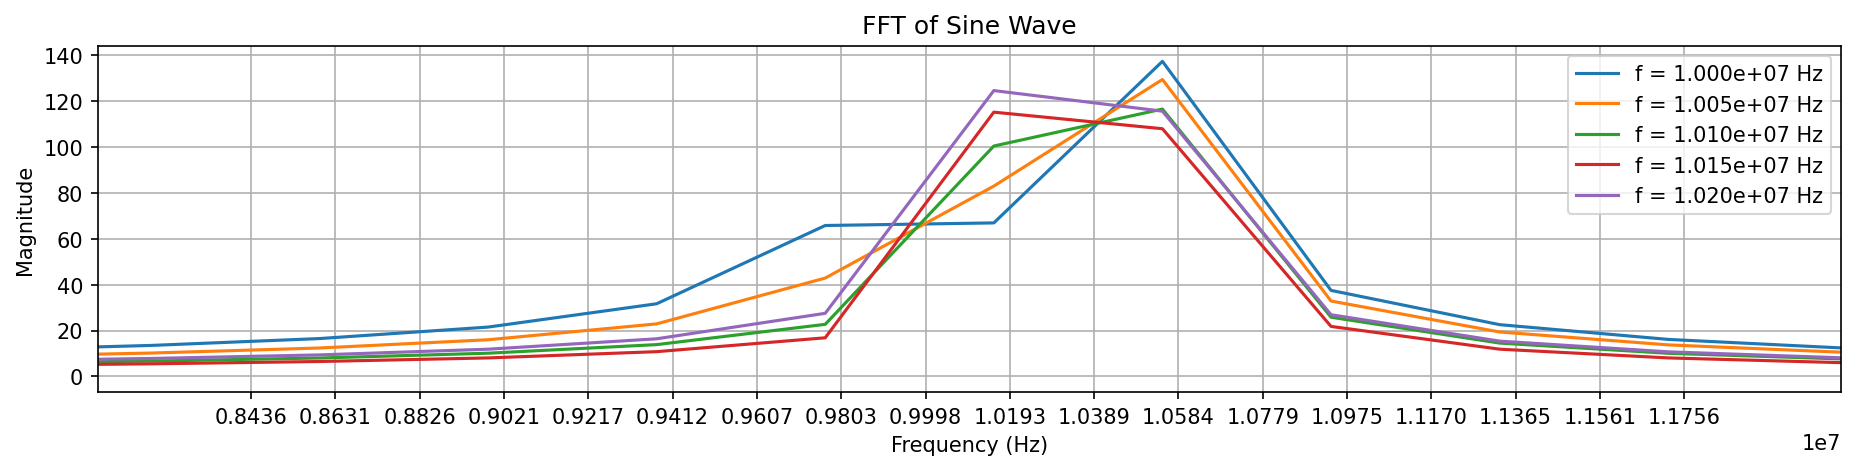

In [210]:
f0 = 10e6 # 10 MHz signal frequency
f1 = 10.2e6 # 10.2 MHz signal frequency
f_mean = (f0+f1)/2
increment = 0.05e6 # 50 kHz/s frequency slope
n = 256

f_other = 10.4e6 # 10.4 MHz signal frequency

frequencies = np.arange(f0, f1+1, increment)
print(frequencies)

t = np.linspace(0, n/fs, n)

plt.figure(figsize=(15, 3), dpi=150)

for f in frequencies:
    sampled_signal = np.sin(2 * np.pi * f * t) + np.sin(2 * np.pi * f_other * t)
    fft = np.fft.fft(sampled_signal)
    fft_freq = np.fft.fftfreq(n, 1/fs)
    fft = np.fft.fftshift(fft)
    fft_freq = np.fft.fftshift(fft_freq)
    plt.plot(fft_freq, np.abs(fft), label='f = {:.3e} Hz'.format(f))

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of Sine Wave')
plt.xlim(f_mean*0.8, f_mean*1.2)
plt.xticks(np.arange(f_mean*0.928*0.9, f_mean*1.072*1.1, fs/n/2))
plt.legend()
plt.grid()
plt.show()

5.3

Size of signal: 2048


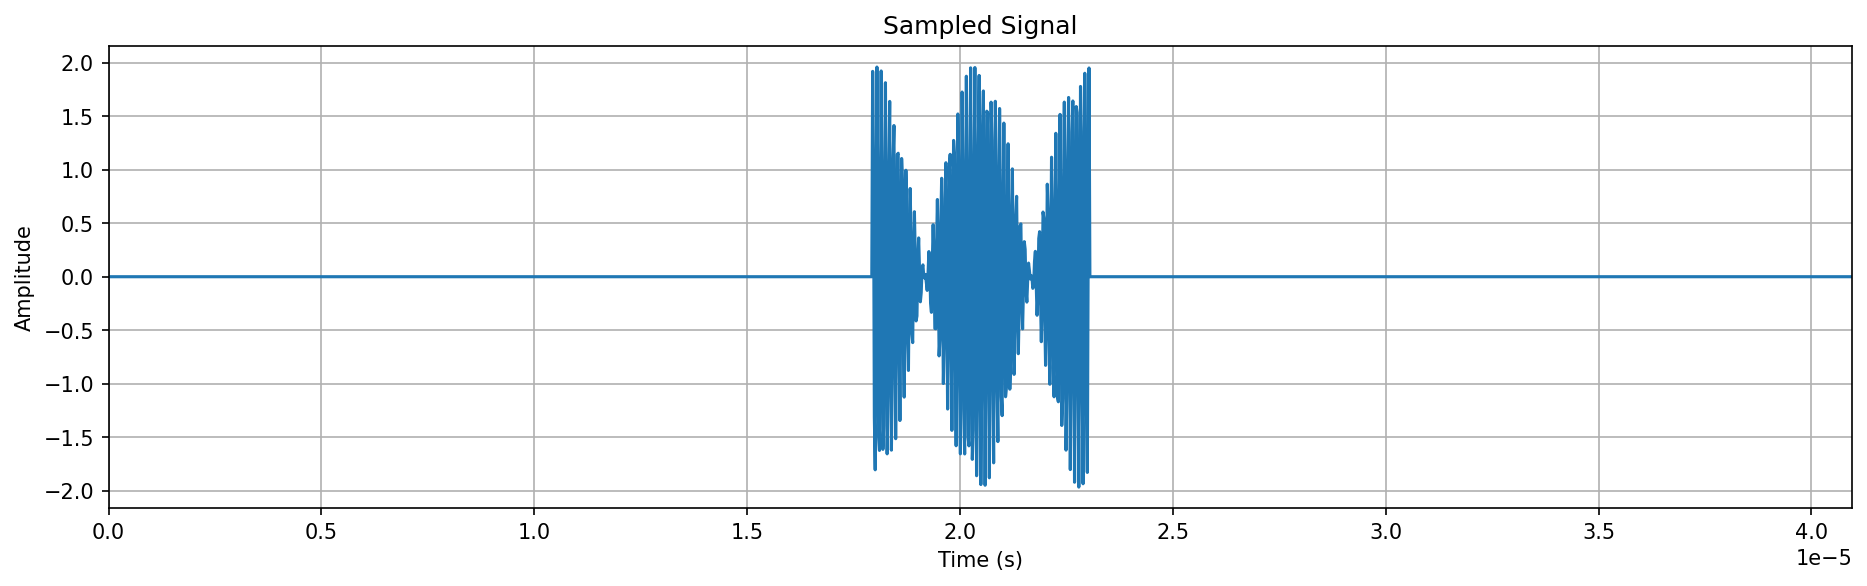

In [211]:
f0 = 10e6 # 10 MHz signal frequency
fs = 50e6 # 50 MHz sampling frequency
n = 256 # number of samples

f_other = 10.4e6 # 10.4 MHz signal frequency

signal_size = 2048

t = np.linspace(0, n/fs, n)

sampled_signal = np.sin(2 * np.pi * f0 * t) + np.sin(2 * np.pi * f_other * t)

fft_isolated = np.fft.fft(sampled_signal)
fft_isolated_freq = np.fft.fftfreq(n, 1/fs)
fft_isolated = np.fft.fftshift(fft_isolated)
fft_isolated_freq = np.fft.fftshift(fft_isolated_freq)

sampled_signal = np.concatenate((np.zeros(int((signal_size - n)/2)), sampled_signal, np.zeros(int((signal_size - n)/2))))

t = np.linspace(0, signal_size/fs, signal_size)

print('Size of signal: {}'.format(sampled_signal.size))

plt.figure(figsize=(15, 4), dpi=150)
plt.plot(t, sampled_signal)
plt.xlim(0, signal_size/fs)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sampled Signal')
plt.grid()
plt.show()



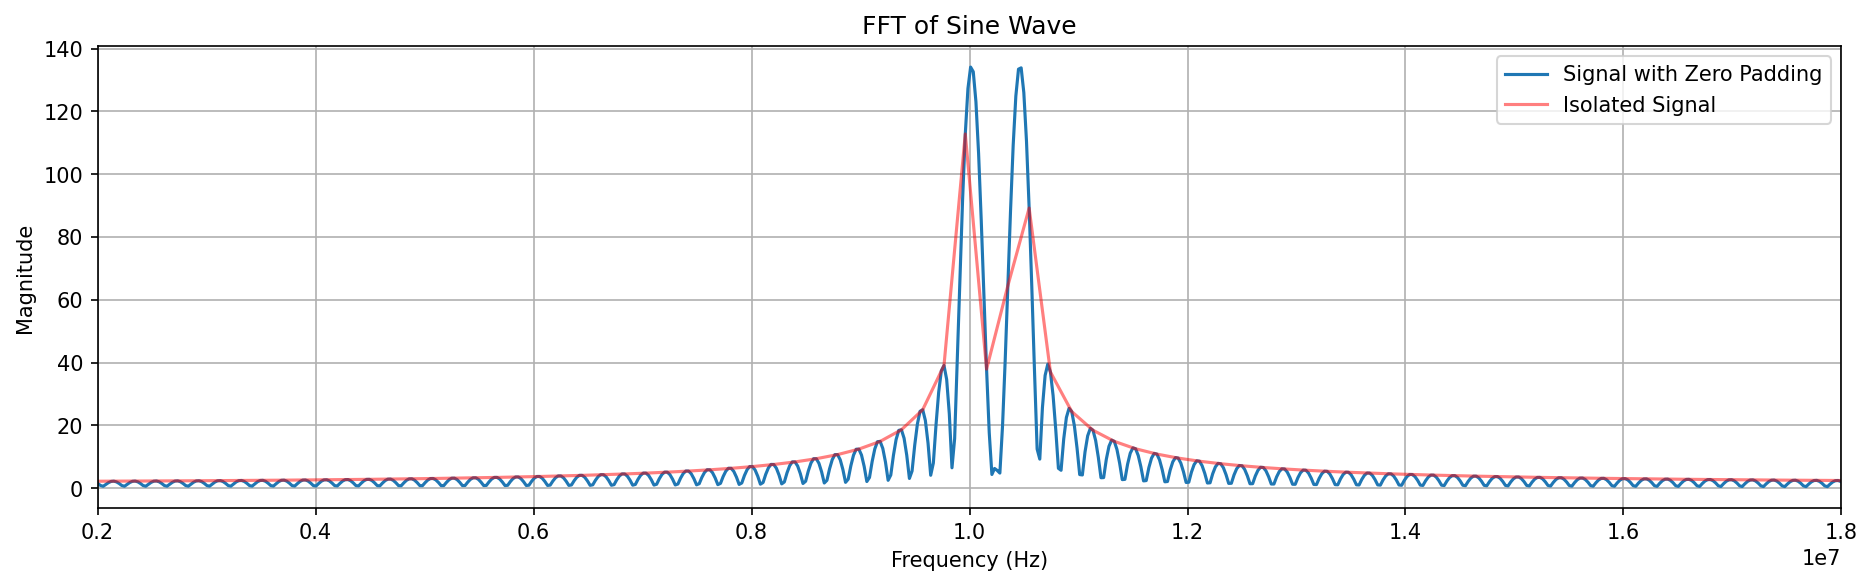

fft complexity: 2048.0 -> 22528.0, ratio: 704.0
Frequency resolution: 195312.5 -> 24414.0625, ratio: 0.125


In [213]:
fft = np.fft.fft(sampled_signal)
fft_freq = np.fft.fftfreq(signal_size, 1/fs)
fft = np.fft.fftshift(fft)
fft_freq = np.fft.fftshift(fft_freq)

plt.figure(figsize=(15, 4), dpi=150)
plt.plot(fft_freq, np.abs(fft), label = 'Signal with Zero Padding')
plt.plot(fft_isolated_freq, np.abs(fft_isolated), 'r', label='Isolated Signal', alpha=0.5)
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of Sine Wave')
plt.xlim(f0*0.2, f0*1.8)
plt.grid()
plt.show()

print(f'fft complexity: {n*np.log2(n)} -> {signal_size*np.log2(signal_size)}, ratio: {signal_size*np.log2(signal_size)/n*np.log2(n)}')
print(f'Frequency resolution: {fs/n} -> {fs/signal_size}, ratio: {(fs/signal_size)/(fs/n)}')


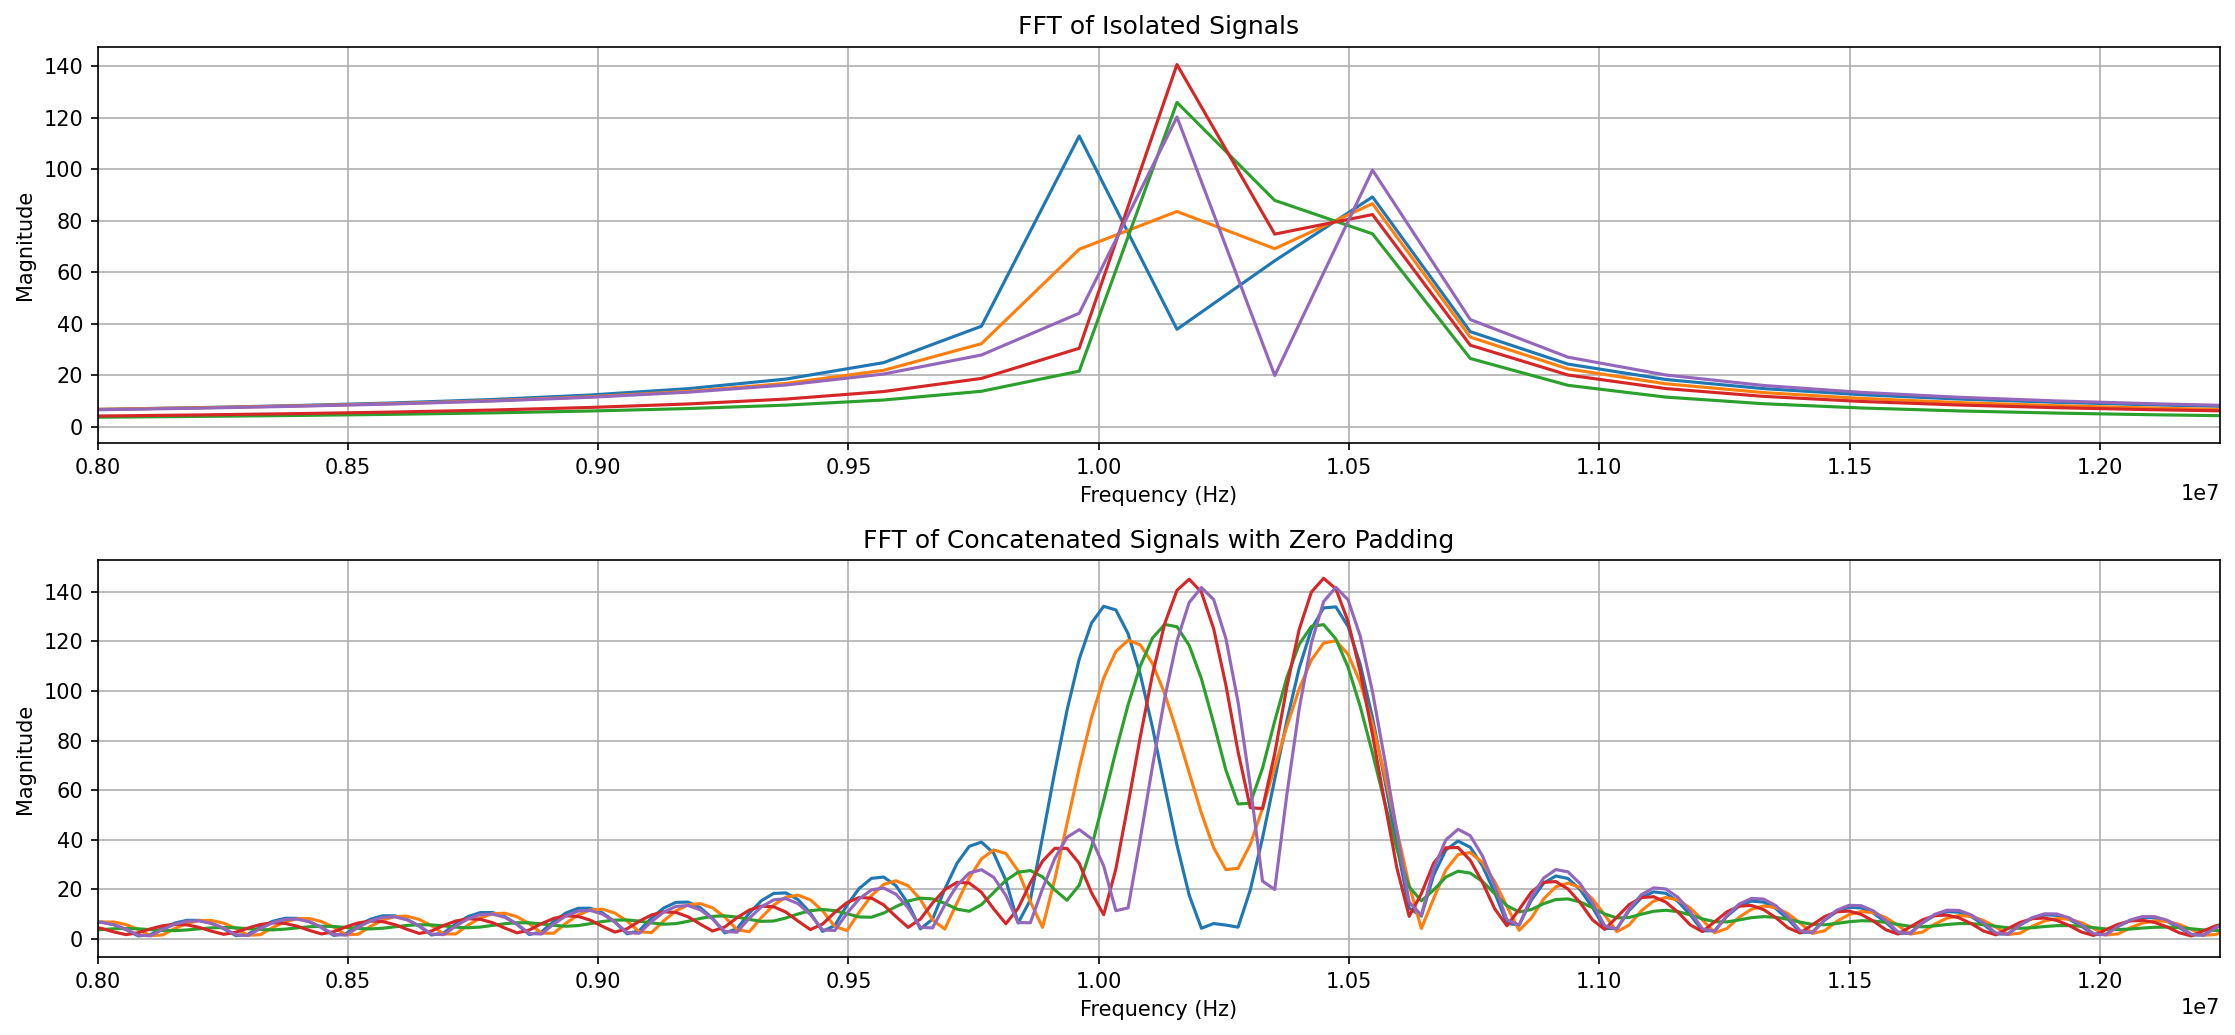

In [214]:
f0 = 10e6  # 10 MHz signal frequency
f1 = 10.2e6  # 10.2 MHz signal frequency
increment = 0.05e6  # 50 kHz/s frequency slope
frequencies = np.arange(f0, f1 + 1, increment)

f_other = 10.4e6  # 10.4 MHz signal frequency

fs = 50e6  # 50 MHz sampling frequency
n = 256  # number of samples
signal_size = 2048

# Time vector for sampling
t = np.linspace(0, n / fs, n)

# Containers for FFT results
isolated_ffts = []
concatenated_ffts = []
fft_freq = np.fft.fftshift(np.fft.fftfreq(signal_size, 1/fs))

# Generate and process each frequency
for freq in frequencies:
    # Generate isolated signal
    sampled_signal = np.sin(2 * np.pi * freq * t) + np.sin(2 * np.pi * f_other * t)
    
    # FFT of isolated signal
    fft_isolated = np.fft.fft(sampled_signal)
    fft_isolated = np.fft.fftshift(fft_isolated)
    isolated_ffts.append(np.abs(fft_isolated))
    
    # Zero-padding and FFT of concatenated signal
    padded_signal = np.concatenate((np.zeros(int((signal_size - n) / 2)), sampled_signal, np.zeros(int((signal_size - n) / 2))))
    fft = np.fft.fft(padded_signal)
    fft = np.fft.fftshift(fft)
    concatenated_ffts.append(np.abs(fft))

# Frequency domain for isolated signals (not padded, so size n)
fft_isolated_freq = np.fft.fftfreq(n, 1/fs)
fft_isolated_freq = np.fft.fftshift(fft_isolated_freq)

# Plot the results: Isolated signals above and concatenated signals below
fig, axes = plt.subplots(2, 1, figsize=(15, 7), dpi=150)

xlim_low = f0 * 0.8
xlim_high = f1 * 1.2

# Plot isolated FFTs (corrected frequency axis)
for fft_isolated in isolated_ffts:
    axes[0].plot(fft_isolated_freq, fft_isolated)
axes[0].set_title('FFT of Isolated Signals')
axes[0].set_xlabel('Frequency (Hz)')
axes[0].set_ylabel('Magnitude')
axes[0].set_xlim(xlim_low, xlim_high)
axes[0].grid()

# Plot concatenated FFTs
for fft_concat in concatenated_ffts:
    axes[1].plot(fft_freq, fft_concat)
axes[1].set_title('FFT of Concatenated Signals with Zero Padding')
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Magnitude')
axes[1].set_xlim(xlim_low, xlim_high)
axes[1].grid()

plt.tight_layout()
plt.show()


5.4

In [215]:
print('The same as above.')

The same as above.
